In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import os,sys


import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostClassifier

#from rgf.sklearn import RGFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
#from ggplot import *
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")



import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
import re

In [3]:
%load_ext watermark
%watermark -v -n -m -p numpy,pandas,matplotlib,seaborn,sklearn,xgboost

Wed Jan 16 2019 

CPython 3.6.4
IPython 6.2.1

numpy 1.14.5
pandas 0.22.0
matplotlib 3.0.0
seaborn 0.8.1
sklearn 0.20.1
xgboost 0.7.post3

compiler   : GCC 7.2.0
system     : Linux
release    : 3.10.0-327.59.1.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 16
interpreter: 64bit


In [29]:
#os.chdir('dataset')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [30]:
train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [31]:
print('Train data:-\n Columns: {}  Rows: {}'.format(train_df.shape[1],train_df.shape[0]))
print('Test data:-\n Columns: {}  Rows: {}'.format(test_df.shape[1],test_df.shape[0]))

Train data:-
 Columns: 17  Rows: 552
Test data:-
 Columns: 16  Rows: 138


In [32]:
train_df.describe()

,id,B,C,H,K,N,O,P
count,552.000000,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000,552.000000
mean,276.500000,31.364899,4.780136,2.259176,2.318841,175.162662,1087.576087,0.552536
std,159.492947,11.873665,4.938454,3.442564,4.297867,154.873746,5758.841945,0.497683
min,1.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,138.750000,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000,0.000000
50%,276.500000,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000,1.000000
75%,414.250000,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000,1.000000
max,552.000000,80.250000,28.000000,28.500000,40.000000,1160.000000,100000.000000,1.000000


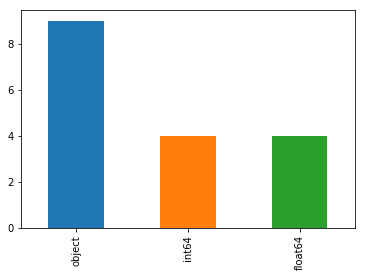

In [33]:
##column datatypes barplot
train_df.dtypes.value_counts().plot(kind='bar')

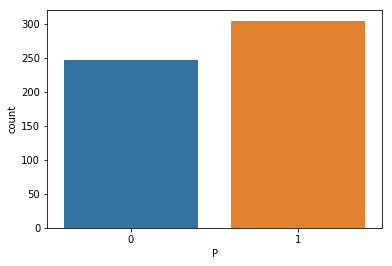

In [34]:
##target distribution
sns.countplot(x='P',data=train_df)

In [35]:
categorical = list(train_df.columns[train_df.dtypes=="object"])
numerical = list(train_df.columns[train_df.dtypes!="object"])

In [36]:
categorical

['A', 'D', 'E', 'F', 'G', 'I', 'J', 'L', 'M']

In [37]:
numerical


['id', 'B', 'C', 'H', 'K', 'N', 'O', 'P']

In [38]:
numerical.remove('id')

In [39]:
numerical.remove('P')

In [40]:
numerical

['B', 'C', 'H', 'K', 'N', 'O']

In [41]:
##checking for null values
print('>>>>>Numerical variables having nulls and its counts<<<<<<<<')
num_nulls = train_df[numerical].isnull().sum()[train_df[numerical].isnull().sum()>0].sort_values(ascending=False)
num_nulls

>>>>>Numerical variables having nulls and its counts<<<<<<<<


N    11
B     9
dtype: int64

In [42]:
##checking for null values
print('>>>>>Categorical variables having nulls and its counts<<<<<<<<')
cat_nulls = test_df[categorical].isnull().sum()[test_df[categorical].isnull().sum()>0].sort_values(ascending=False)
cat_nulls

>>>>>Categorical variables having nulls and its counts<<<<<<<<


A    4
G    2
F    2
E    1
D    1
dtype: int64

In [43]:
##numerical
train_df['B'].fillna(train_df['B'].median(),inplace=True)
train_df['N'].fillna(train_df['N'].median(),inplace=True)
test_df['B'].fillna(train_df['B'].median(),inplace=True)
test_df['N'].fillna(train_df['N'].median(),inplace=True)

In [44]:
train_df['A'].fillna(train_df['A'].value_counts().index[0],inplace=True)
train_df['G'].fillna(train_df['G'].value_counts().index[0],inplace=True)
train_df['F'].fillna(train_df['F'].value_counts().index[0],inplace=True)
train_df['E'].fillna(train_df['E'].value_counts().index[0],inplace=True)
train_df['D'].fillna(train_df['D'].value_counts().index[0],inplace=True)

test_df['A'].fillna(train_df['A'].value_counts().index[0],inplace=True)
test_df['G'].fillna(train_df['G'].value_counts().index[0],inplace=True)
test_df['F'].fillna(train_df['F'].value_counts().index[0],inplace=True)
test_df['E'].fillna(train_df['E'].value_counts().index[0],inplace=True)
test_df['D'].fillna(train_df['D'].value_counts().index[0],inplace=True)

In [45]:
original_train = train_df.copy()
original_test = test_df.copy()

##### Distribution of Continuous Variables and Effect on Target

In [46]:
from scipy.stats import skew, boxcox
skewed_feats = train_df[numerical].apply(lambda x: skew(x.dropna()))
print("\nSkew in numeric features:")
print(skewed_feats)


Skew in numeric features:
B     1.124167
C     1.413447
H     2.989292
K     2.903900
N     1.373721
O    12.087691
dtype: float64


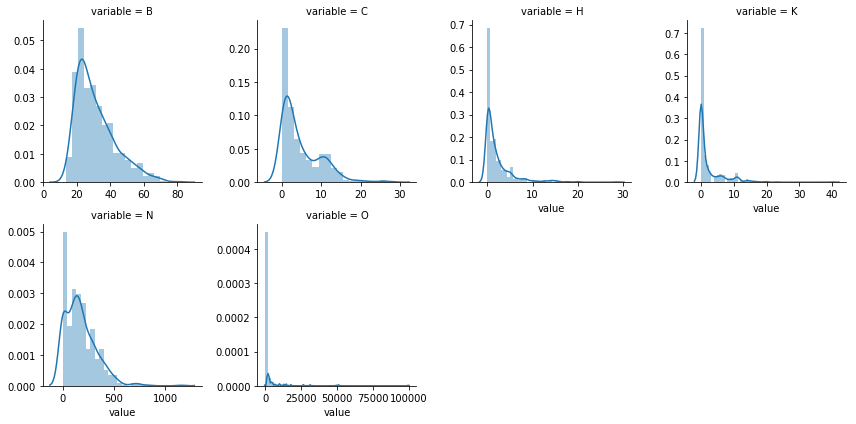

In [47]:
###numerical columns histogram- Train
numdf=pd.melt(train_df,value_vars=numerical)
numgrid=sns.FacetGrid(numdf,col='variable',col_wrap=4,sharex=False,sharey=False)
numgrid=numgrid.map(sns.distplot,'value')
numgrid

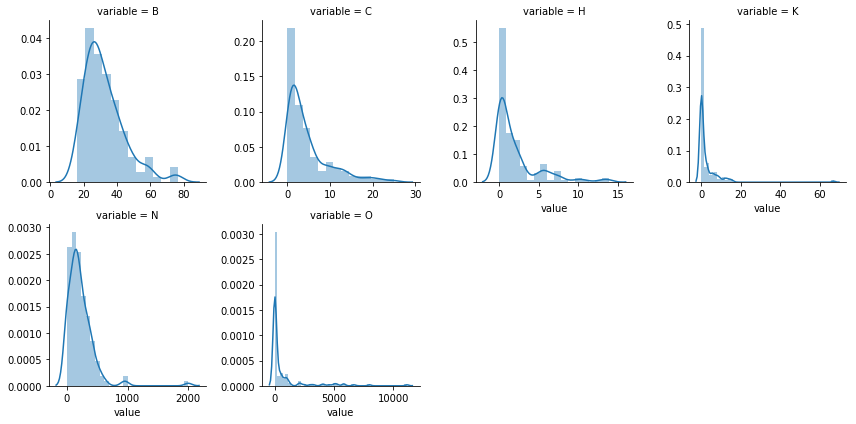

In [48]:
###we'll check the distribution in test to check for any covariate shift
###numerical columns histogram
numdf=pd.melt(test_df,value_vars=numerical)
numgrid=sns.FacetGrid(numdf,col='variable',col_wrap=4,sharex=False,sharey=False)
numgrid=numgrid.map(sns.distplot,'value')
numgrid

Both train and test data seems to have similar distribution and therefore no covariate shift in data.We'll normalize the data in order compare the results of models like SVM with tree based methods on the same data.

In [49]:
def density_plot(df):
    ''' Explore data by plotting KDE graphs. '''

    fig = plt.figure(1, figsize=(25,10))
    
    fig.subplots_adjust(bottom= -1, left=0.025, top = 2, right=0.975)  
    i = 1
    
    for col in df.columns:
        if col=='P':
            continue
        plt.subplot(8,2,0 + i)
        j = i - 1
        
        #Plot KDE for all labels
        sns.distplot(df[df['P'] == 0].iloc[:,j], hist = False, label = 'P=0', kde_kws={"lw":4})
        sns.distplot(df[df['P'] == 1].iloc[:,j], hist = False, label = 'P=1', kde_kws={"lw":4})
        plt.legend();
        i = i + 1
    
    #Define plot format    
    #DefaultSize = fig.get_size_inches()
    #fig.set_size_inches((DefaultSize[0]*1.2, DefaultSize[1]*1.2))

    plt.show()

We can see how the distribution of features changes for each of the binary output variable

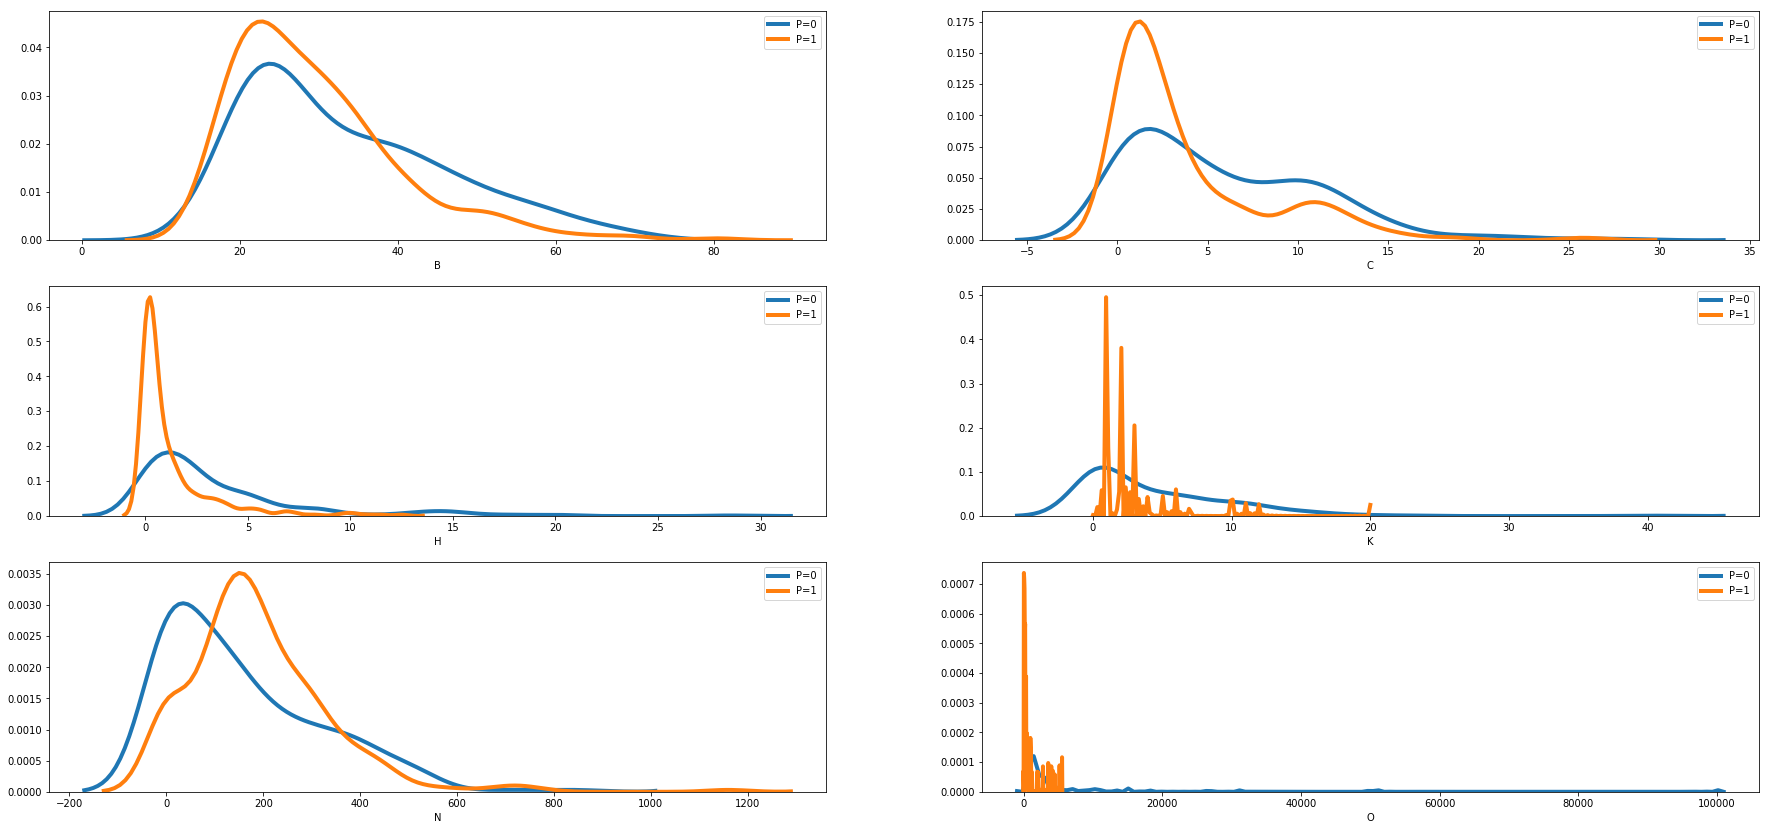

In [50]:
density_plot(train_df[numerical+['P']])

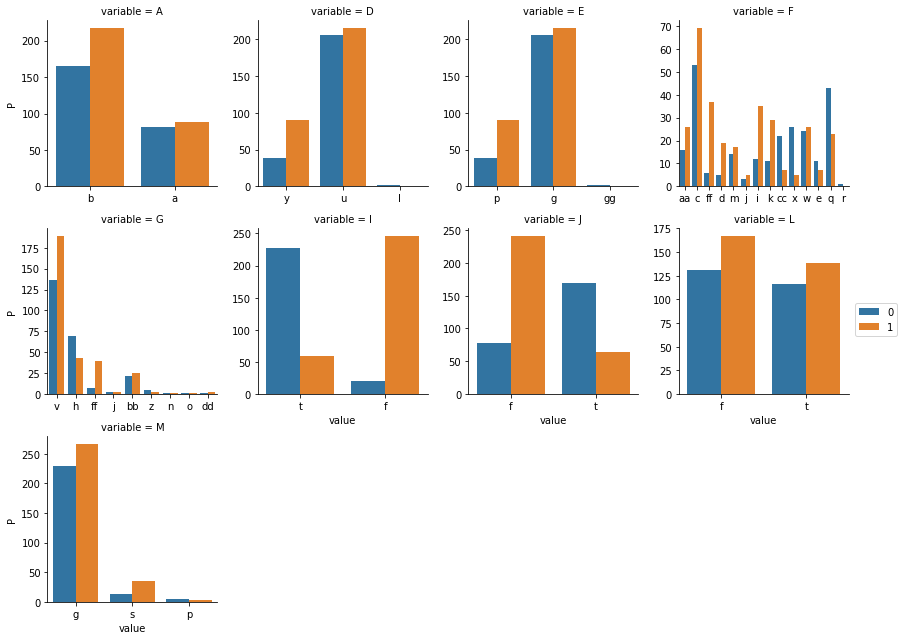

In [51]:
##visualizing the contingency table for each categorical variable
def countplot(x,y,**kwargs):
            #sns.boxplot(x=x,y=y)
            sns.countplot(x=x,hue=y)#,data=train_df)
            #x = plt.xticks(rotation=90)
            


p = pd.melt(train_df, value_vars=categorical,id_vars='P')
g = sns.FacetGrid (p, col='variable', col_wrap=4, sharex=False, sharey=False, size=3)
g = g.map(countplot, 'value','P')
g.add_legend()

In [52]:
train_df['P'] = train_df['P'].astype('str')

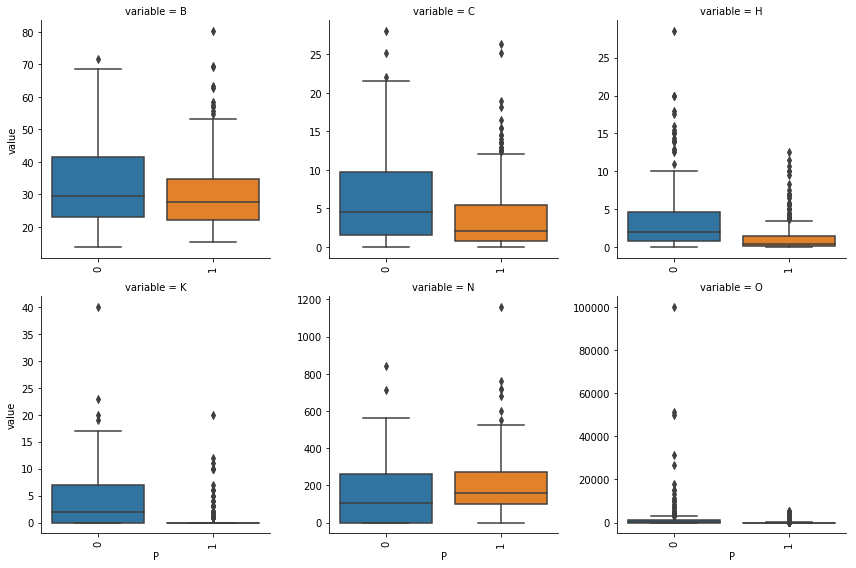

In [53]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)
p = pd.melt(train_df, value_vars=numerical,id_vars='P')
g = sns.FacetGrid (p, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(boxplot, 'P','value')

#def outliers_iqr(col,k=7):
    quartile_1, quartile_3 = np.percentile(col, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * k)
    upper_bound = quartile_3 + (iqr * k)
    #print(col.name,sum([x < lower_bound or x > upper_bound for x in col]))
    return [True if x < lower_bound or x > upper_bound else False for x in col]

outlier_mask = train_df[numerical].apply(outliers_iqr)

In [54]:
train_df[numerical].corr()

,B,C,H,K,N,O
B,1.000000,0.151406,0.404109,0.242301,-0.077251,0.014244
C,0.151406,1.000000,0.287374,0.301832,-0.208412,0.141069
H,0.404109,0.287374,1.000000,0.390157,-0.113929,0.050995
K,0.242301,0.301832,0.390157,1.000000,-0.164861,0.066033
N,-0.077251,-0.208412,-0.113929,-0.164861,1.000000,0.080144
O,0.014244,0.141069,0.050995,0.066033,0.080144,1.000000


In [55]:
##categorical features label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical:
    le.fit(train_df[col])
    train_df[col+'_label'] = le.transform(train_df[col])
    test_df[col+'_label'] = le.transform(test_df[col])

In [56]:
cat_label_feat = [x for x in train_df.columns if re.search(r".*label.*",x)]
for col in cat_label_feat:
    train_df[col] = train_df[col].astype('category') 
    test_df[col] = test_df[col].astype('category') 

In [57]:
##categorical features one-hot encoding

for col in categorical:
    train_df[col] = train_df[col].astype('str')
    test_df[col] = test_df[col].astype('str')

In [58]:
ohencoder = OneHotEncoder(categories='auto')
for col in categorical:
    encoded = ohencoder.fit_transform(train_df[col].reshape(-1,1)).toarray()
    
    dfOneHot = pd.DataFrame(encoded, columns = [str(col)+'_ohe_'+str(int(i)) for i in range(encoded.shape[1])])
    train_df = pd.concat([train_df, dfOneHot], axis=1)
    
    encoded_test = ohencoder.transform(test_df[col].reshape(-1,1)).toarray()
    dfOneHot_test = pd.DataFrame(encoded_test, columns = [str(col)+'_ohe_'+str(int(i)) for i in range(encoded_test.shape[1])])
    test_df = pd.concat([test_df, dfOneHot_test], axis=1)



In [59]:
import re
ohe_feat = [x for x in train_df.columns if re.search(r".*ohe.*",x)]

In [60]:
for col in categorical:
    train_df[col] = train_df[col].astype('category') 
    test_df[col] = test_df[col].astype('category') 

In [61]:
train_labels  = train_df['P']
train_df  = train_df.drop(['P'],axis=1)


In [62]:
target = ['P']

In [63]:
##saving data
train_df.to_csv('trn_label_enc_ohe_enc.csv', index=False)
test_df.to_csv('tst_label_enc_ohe_enc.csv', index=False)

np.save('y_trn.npy', train_labels.values)


In [64]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,precision_recall_curve,log_loss

As we know our target variable is balanced and hence instead of stratified kfold cross validation we'll perform repeated k-fold n times with different splits in each repetition.

In [65]:
from sklearn.model_selection import RepeatedKFold
def repeat_kfold(train_data,feat_cols,lr):
    split = RepeatedKFold(n_splits=5,n_repeats=3,random_state=43)
    i=1
    j=1
    final_result = dict()
    for train_index,test_index in split.split(train_df):
        #print("##########")
        dict_results = dict()
        X_train , X_val = train_data.iloc[train_index],train_data.iloc[test_index]
        y_train , y_val = train_labels.iloc[train_index],train_labels.iloc[test_index]
        X_train = X_train[feat_cols]
        X_val = X_val[feat_cols]
        lr.fit(X_train,y_train)
        y_predicted_val = lr.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_predicted_val)
        dict_results['accuracy'] = accuracy_score(y_val, lr.predict(X_val))
        dict_results['precision'] = precision_score(y_val, lr.predict(X_val),pos_label="1")
        dict_results['recall'] = recall_score(y_val, lr.predict(X_val),pos_label="1")
        dict_results['f1score'] = f1_score(y_val, lr.predict(X_val),pos_label="1")
        dict_results['roc_auc_score'] = auc
        tn, fp, fn, tp = confusion_matrix(y_val, lr.predict(X_val)).ravel()
        dict_results['TN'] = tn
        dict_results['FP'] = fp
        dict_results['FN'] = fn
        dict_results['TP'] = tp
        if i%5==0:
            j+=1
            i=0

        final_result['fold'+str(i)+'_repetition'+str(j)]= dict_results
        #print(str(i)+'fold completed')
        i+=1
    return pd.DataFrame(final_result).T
        


In [67]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#lr.fit(X_train,y_train)


In [68]:
result = repeat_kfold(train_df,numerical+ohe_feat,lr)

In [69]:
result.T

,fold0_repetition2,fold0_repetition3,fold0_repetition4,fold1_repetition1,fold1_repetition2,fold1_repetition3,fold2_repetition1,fold2_repetition2,fold2_repetition3,fold3_repetition1,fold3_repetition2,fold3_repetition3,fold4_repetition1,fold4_repetition2,fold4_repetition3
FN,9.000000,12.000000,7.000000,6.000000,7.000000,3.000000,9.000000,9.000000,7.000000,12.000000,14.000000,14.000000,7.000000,7.000000,8.000000
FP,2.000000,10.000000,9.000000,18.000000,5.000000,4.000000,4.000000,7.000000,8.000000,2.000000,7.000000,4.000000,8.000000,7.000000,10.000000
TN,41.000000,36.000000,35.000000,35.000000,47.000000,51.000000,43.000000,41.000000,45.000000,46.000000,43.000000,38.000000,48.000000,44.000000,43.000000
TP,58.000000,52.000000,59.000000,52.000000,52.000000,53.000000,55.000000,54.000000,51.000000,50.000000,46.000000,54.000000,47.000000,52.000000,49.000000
accuracy,0.900000,0.800000,0.854545,0.783784,0.891892,0.936937,0.882883,0.855856,0.864865,0.872727,0.809091,0.836364,0.863636,0.872727,0.836364
f1score,0.913386,0.825397,0.880597,0.812500,0.896552,0.938053,0.894309,0.870968,0.871795,0.877193,0.814159,0.857143,0.862385,0.881356,0.844828
precision,0.966667,0.838710,0.867647,0.742857,0.912281,0.929825,0.932203,0.885246,0.864407,0.961538,0.867925,0.931034,0.854545,0.881356,0.830508
recall,0.865672,0.812500,0.893939,0.896552,0.881356,0.946429,0.859375,0.857143,0.879310,0.806452,0.766667,0.794118,0.870370,0.881356,0.859649
roc_auc_score,0.970149,0.880095,0.881198,0.852960,0.936441,0.963961,0.930851,0.933532,0.925179,0.963710,0.905000,0.933824,0.928241,0.922233,0.903012


In [70]:
print("mean accuracy >>",result.mean()['accuracy'])
print("mean precision >>",result.mean()['precision'])
print("mean recall >>",result.mean()['recall'])
print("mean f1score >>",result.mean()['f1score'])
print("mean roc_auc_score >>",result.mean()['roc_auc_score'])

mean accuracy >> 0.8574447174447174
mean precision >> 0.884449947598636
mean recall >> 0.8580591211653511
mean f1score >> 0.8693746677694869
mean roc_auc_score >> 0.9220257309243639


In [71]:
##Linear disriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
train_df_scaled = train_df.copy()
test_df_scaled = test_df.copy()
sc = StandardScaler()  
train_df_scaled[numerical] = sc.fit_transform(train_df_scaled[numerical])  
test_df_scaled[numerical] = sc.transform(test_df_scaled[numerical]) 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df_scaled[numerical+ohe_feat], train_labels, test_size=0.2, random_state=0)  

In [72]:
##saving data
##saving data
train_df_scaled.to_csv('trn_scaled_label_enc_ohe_enc.csv', index=False)
test_df_scaled.to_csv('tst_scaled_label_enc_ohe_enc.csv', index=False)

#np.save('y_trn.npy', train_labels.values)


In [73]:
lda = LDA(n_components=2)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test)  

In [74]:
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
 

y_pred = clf.predict(X_test)

In [75]:
print('accuracy',accuracy_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred,pos_label="1"))
print('recall',recall_score(y_test, y_pred,pos_label="1"))
print('f1_score',f1_score(y_test, y_pred,pos_label="1"))

accuracy 0.8468468468468469
precision 0.9491525423728814
recall 0.8
f1_score 0.8682170542635659


Since we are dealing with balanced target class, LDA is able to perform well and approximates the bayes classifier decision boundary.

In [76]:
##RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=43)
#result_rf = repeat_kfold(train_df,rf_clf)

In [77]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]# Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree
# Create the random grid
rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [78]:
clf_random = RandomizedSearchCV(estimator = rf_clf,scoring='roc_auc', param_distributions = rf_param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    
clf_random.fit(train_df[numerical+ohe_feat], train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   55.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=43, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

In [79]:
clf_random.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

In [80]:
result_rf = repeat_kfold(train_df,numerical+ohe_feat,clf_random.best_estimator_)

In [81]:
print("mean accuracy >>",result_rf.mean()['accuracy'])
print("mean precision >>",result_rf.mean()['precision'])
print("mean recall >>",result_rf.mean()['recall'])
print("mean f1score >>",result_rf.mean()['f1score'])
print("mean roc_auc_score >>",result_rf.mean()['roc_auc_score'])

mean accuracy >> 0.8659022659022659
mean precision >> 0.883079819082217
mean recall >> 0.8764090885530088
mean f1score >> 0.8782733325932504
mean roc_auc_score >> 0.9361335877218927


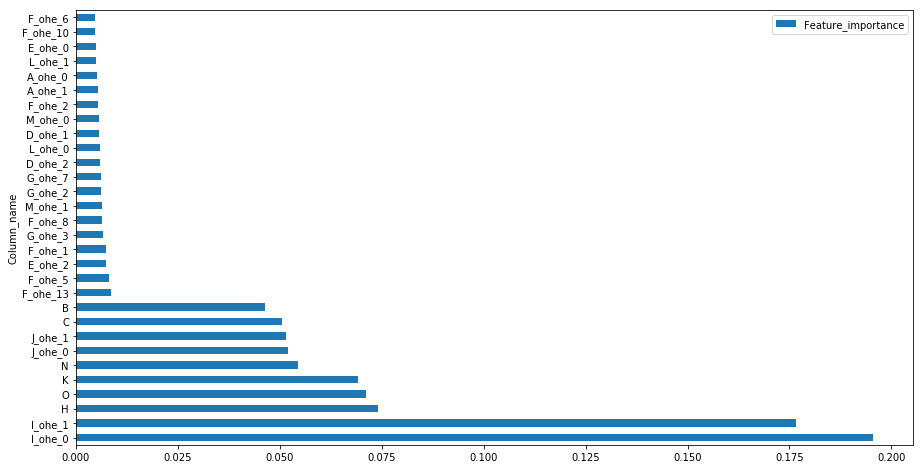

In [82]:
feat_imp = pd.DataFrame(clf_random.best_estimator_.feature_importances_)
feat_imp.columns = ['Feature_importance']
feat_imp = feat_imp.assign(Column_name=numerical+ohe_feat)
feat_imp.sort_values(by=['Feature_importance'],ascending=False).set_index('Column_name').head(30).plot(kind='barh',figsize=(15,8))

The importance of feature I and J with low cardinalty is evident from the contingency plots of variable classes with the target value plotted above and it has been considered important in tree building process for splits whereas high cardinal features have less importance

In [83]:
##XGBOOST
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(xgb_model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)


In [84]:
grid_search.fit(train_df[numerical+ohe_feat],train_labels)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  59 out of  81 | elapsed:    1.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  68 out of  81 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of  81 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    1.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 30, 50], 'min_child_weight': [1, 3, 6], 'n_estimators': [200], 'learning_rate': [0.05, 0.1, 0.16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [85]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.16, max_delta_step=0,
       max_depth=10, min_child_weight=3, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [86]:
grid_search.best_params_

{'learning_rate': 0.16,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 200}

In [87]:
final_xgb = XGBClassifier(max_depth=10, min_child_weight=3,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)

In [88]:
result_xgb = repeat_kfold(train_df,numerical+ohe_feat,final_xgb)

In [89]:
result_xgb.T

,fold0_repetition2,fold0_repetition3,fold0_repetition4,fold1_repetition1,fold1_repetition2,fold1_repetition3,fold2_repetition1,fold2_repetition2,fold2_repetition3,fold3_repetition1,fold3_repetition2,fold3_repetition3,fold4_repetition1,fold4_repetition2,fold4_repetition3
FN,10.000000,6.000000,7.000000,7.000000,6.000000,5.000000,6.000000,6.000000,5.000000,8.000000,11.000000,12.000000,5.000000,7.000000,7.000000
FP,2.000000,10.000000,6.000000,13.000000,5.000000,8.000000,12.000000,4.000000,9.000000,3.000000,5.000000,6.000000,8.000000,6.000000,10.000000
TN,41.000000,36.000000,38.000000,40.000000,47.000000,47.000000,35.000000,44.000000,44.000000,45.000000,45.000000,36.000000,48.000000,45.000000,43.000000
TP,57.000000,58.000000,59.000000,51.000000,53.000000,51.000000,58.000000,57.000000,53.000000,54.000000,49.000000,56.000000,49.000000,52.000000,50.000000
accuracy,0.890909,0.854545,0.881818,0.819820,0.900901,0.882883,0.837838,0.909910,0.873874,0.900000,0.854545,0.836364,0.881818,0.881818,0.845455
f1score,0.904762,0.878788,0.900763,0.836066,0.905983,0.886957,0.865672,0.919355,0.883333,0.907563,0.859649,0.861538,0.882883,0.888889,0.854701
precision,0.966102,0.852941,0.907692,0.796875,0.913793,0.864407,0.828571,0.934426,0.854839,0.947368,0.907407,0.903226,0.859649,0.896552,0.833333
recall,0.850746,0.906250,0.893939,0.879310,0.898305,0.910714,0.906250,0.904762,0.913793,0.870968,0.816667,0.823529,0.907407,0.881356,0.877193
roc_auc_score,0.962513,0.891304,0.907713,0.885491,0.947197,0.950974,0.941157,0.957011,0.936239,0.950941,0.919333,0.937325,0.928241,0.941841,0.926514


In [90]:
print("mean accuracy >>",result_xgb.mean()['accuracy'])
print("mean precision >>",result_xgb.mean()['precision'])
print("mean recall >>",result_xgb.mean()['recall'])
print("mean f1score >>",result_xgb.mean()['f1score'])
print("mean roc_auc_score >>",result_xgb.mean()['roc_auc_score'])

mean accuracy >> 0.8701665301665302
mean precision >> 0.8844788163422947
mean recall >> 0.8827460352351812
mean f1score >> 0.882460079578879
mean roc_auc_score >> 0.9322530204921271


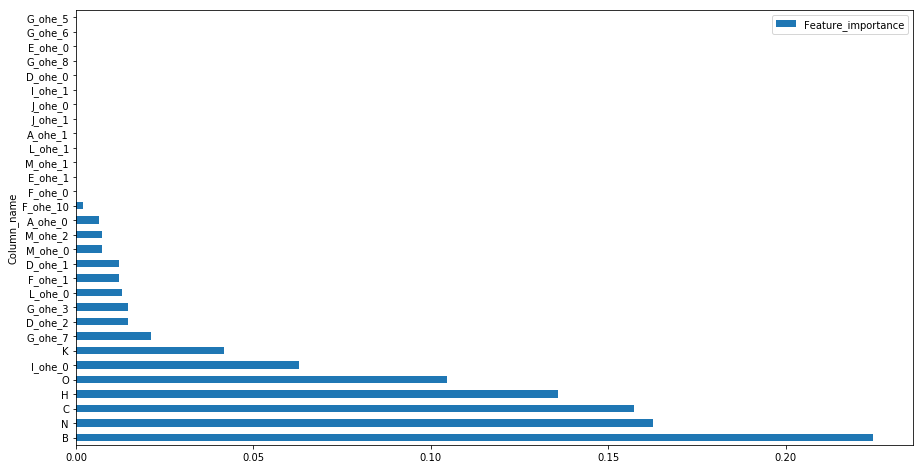

In [91]:
feat_imp = pd.DataFrame(final_xgb.feature_importances_)
feat_imp.columns = ['Feature_importance']
feat_imp = feat_imp.assign(Column_name=numerical+ohe_feat)
feat_imp.sort_values(by=['Feature_importance'],ascending=False).set_index('Column_name').head(30).plot(kind='barh',figsize=(15,8))

In [92]:
##Lightgbm
import lightgbm as lgb

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train_df[numerical+categorical],train_labels)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  67 out of  81 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    1.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [25, 50, 75], 'learning_rate': [0.01, 0.05, 0.1], 'num_leaves': [300, 900, 1200], 'n_estimators': [200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

In [93]:
lgbm_params = grid_search.best_params_

In [94]:
lgbm_params

{'learning_rate': 0.05,
 'max_depth': 25,
 'n_estimators': 200,
 'num_leaves': 300}

In [95]:
###lgbm handles categorical values as-is if they are encoded as categorical type in pandas df
final_lgbm = lgb.LGBMClassifier(**lgbm_params)
result_lgbm = repeat_kfold(train_df,numerical+cat_label_feat,final_lgbm)

In [96]:
result_lgbm.T

,fold0_repetition2,fold0_repetition3,fold0_repetition4,fold1_repetition1,fold1_repetition2,fold1_repetition3,fold2_repetition1,fold2_repetition2,fold2_repetition3,fold3_repetition1,fold3_repetition2,fold3_repetition3,fold4_repetition1,fold4_repetition2,fold4_repetition3
FN,9.000000,6.000000,8.000000,9.000000,7.000000,3.000000,5.000000,8.000000,4.000000,10.000000,9.000000,14.000000,2.000000,6.000000,6.000000
FP,3.000000,12.000000,9.000000,15.000000,5.000000,9.000000,9.000000,7.000000,10.000000,4.000000,7.000000,5.000000,10.000000,9.000000,8.000000
TN,40.000000,34.000000,35.000000,38.000000,47.000000,46.000000,38.000000,41.000000,43.000000,44.000000,43.000000,37.000000,46.000000,42.000000,45.000000
TP,58.000000,58.000000,58.000000,49.000000,52.000000,53.000000,59.000000,55.000000,54.000000,52.000000,51.000000,54.000000,52.000000,53.000000,51.000000
accuracy,0.890909,0.836364,0.845455,0.783784,0.891892,0.891892,0.873874,0.864865,0.873874,0.872727,0.854545,0.827273,0.890909,0.863636,0.872727
f1score,0.906250,0.865672,0.872180,0.803279,0.896552,0.898305,0.893939,0.880000,0.885246,0.881356,0.864407,0.850394,0.896552,0.876033,0.879310
precision,0.950820,0.828571,0.865672,0.765625,0.912281,0.854839,0.867647,0.887097,0.843750,0.928571,0.879310,0.915254,0.838710,0.854839,0.864407
recall,0.865672,0.906250,0.878788,0.844828,0.881356,0.946429,0.921875,0.873016,0.931034,0.838710,0.850000,0.794118,0.962963,0.898305,0.894737
roc_auc_score,0.954877,0.891304,0.915289,0.871828,0.949153,0.947078,0.952793,0.952712,0.941444,0.944556,0.926000,0.947479,0.949735,0.938185,0.934790


In [97]:
print("mean accuracy >>",result_lgbm.mean()['accuracy'])
print("mean precision >>",result_lgbm.mean()['precision'])
print("mean recall >>",result_lgbm.mean()['recall'])
print("mean f1score >>",result_lgbm.mean()['f1score'])
print("mean roc_auc_score >>",result_lgbm.mean()['roc_auc_score'])

mean accuracy >> 0.8623150423150424
mean precision >> 0.870492810959163
mean recall >> 0.8858719453656295
mean f1score >> 0.8766316283582967
mean roc_auc_score >> 0.9344815860711685


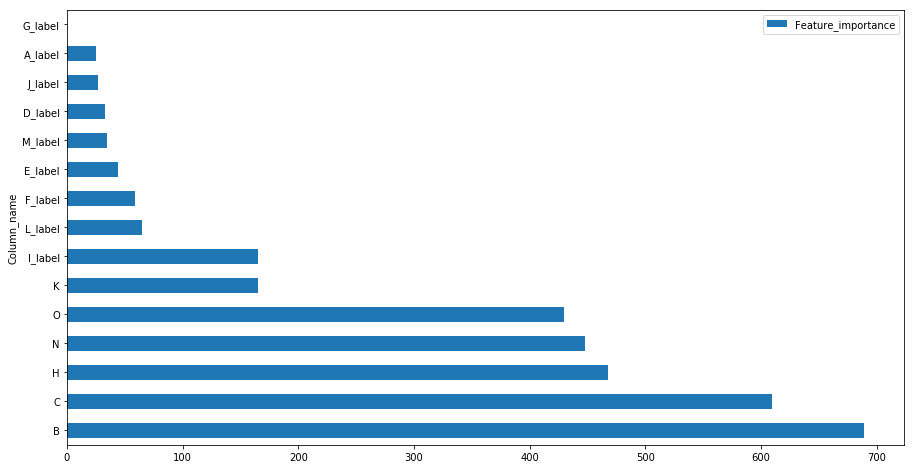

In [98]:
feat_imp = pd.DataFrame(final_lgbm.feature_importances_)
feat_imp.columns = ['Feature_importance']
feat_imp = feat_imp.assign(Column_name=numerical+cat_label_feat)
feat_imp.sort_values(by=['Feature_importance'],ascending=False).set_index('Column_name').head(30).plot(kind='barh',figsize=(15,8))

In [99]:
categorical

['A', 'D', 'E', 'F', 'G', 'I', 'J', 'L', 'M']

In [100]:
##SVM
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV

svclassifier = SVC()
param_grid_svc = {'kernel':['linear','rbf'],'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
svc_grid_search = GridSearchCV(estimator=svclassifier,param_grid=param_grid_svc,cv=5)
##since svm requires scaled features we'll use the scaled version of the data
svc_grid_search.fit(train_df_scaled[numerical+ohe_feat],train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
svc_grid_search.best_params_

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

In [102]:
p = {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

In [103]:
svc_check = SVC(**p)

In [104]:
svc_check

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
scores = cross_val_score(svc_check,train_df_scaled[numerical+ohe_feat],train_labels,cv=3,scoring='roc_auc')

In [106]:
scores.mean()

0.9215289975523974

## Feature engineering and transformations

interaction features,count/frequency/mean encoding,
https://github.com/MaxHalford/xam/blob/master/docs/feature-extraction.md#smooth-target-encoding

In [273]:
train_df2 = train_df.copy()
test_df2 = test_df.copy()

train_df2['P'] = train_labels

In [274]:
for col in cat_label_feat:
    train_df2[col] = train_df2[col].astype('category').cat.codes
    test_df2[col] = test_df2[col].astype('category').cat.codes

In [275]:
##frequency encoding
for col in cat_label_feat:
    encoding = train_df2.groupby(col).size()
    # get frequency of each category
    encoding = encoding/len(train_df2)
    train_df2[col+'freq_enc'] = train_df2[col].map(encoding)
    test_df2[col+'freq_enc'] = test_df2[col].map(encoding)

In [276]:
enc_freq_cols = [x for x in train_df2.columns if re.search(r".*freq_enc.*",x)]

In [277]:
def target_encoder_regularized(train, test, cols_encode, target_cols, folds = 5, stratified=True):
    """
    Mean regularized target encoding based on kfold   
    """
    
    if stratified:
        skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1)
        X = train.drop('P', axis=1)
        Y = train['P']
        splitter = skf.split(X, Y)
    else:
        kf = KFold(n_splits=folds, shuffle=True, random_state=1)
        splitter = kf.split(X)
    
    train_new = pd.DataFrame()
    for train_index, val_index in splitter:
        train_fold = train.loc[train_index]
        test_fold = train.loc[val_index]

        for by in cols_encode:
            for target in target_cols:

                encoding = train_fold.groupby(by)[target].mean()
                test_fold[target + '_mean_' + by] = test_fold[by].map(encoding)

                impute = np.mean(train_fold[target])
                test_fold.fillna(impute, inplace=True)
        train_new = pd.concat((train_new, test_fold), axis=0)
    
    #making test encoding using full training data  
    test_new = test.copy()
    for by in cols_encode:
        for target in target_cols:
            test_new['%s_mean_%s' % (target, by)] = test_new[by].map(train_new.reset_index(drop=True).groupby(by)[target].mean())

    return train_new.reset_index(drop=True), test_new.reset_index(drop=True)

In [278]:
train_df2['P'] = train_df2['P'].astype('category').cat.codes

In [279]:
train_enc, test_enc = target_encoder_regularized(train_df2[numerical+enc_freq_cols+ohe_feat+cat_label_feat+['P']], test_df2[numerical+enc_freq_cols+ohe_feat+cat_label_feat],cat_label_feat,'P',folds = 5)

In [280]:
###Interaction terms
numerics = train_enc.loc[:, numerical]
##we'll add 1 to each column values to ensure division by zero is avoided
for col in numerical:
    numerics[col] = numerics[col]+1
# for each pair of variables, determine which mathmatical operators to use based on redundancy
for i in range(0, numerics.columns.size-1):
    for j in range(0, numerics.columns.size-1):
        col1 = str(numerics.columns.values[i])
        col2 = str(numerics.columns.values[j])
        # multiply fields together (we allow values to be squared)
        if i <= j:
            name = col1 + "*" + col2
            train_enc = pd.concat([train_enc, pd.Series(numerics.iloc[:,i] * numerics.iloc[:,j], name=name)], axis=1)
        # add fields together
        if i < j:
            name = col1 + "+" + col2
            train_enc = pd.concat([train_enc, pd.Series(numerics.iloc[:,i] + numerics.iloc[:,j], name=name)], axis=1)
        # divide and subtract fields from each other
        if not i == j:
            name = col1 + "/" + col2
            train_enc = pd.concat([train_enc, pd.Series(numerics.iloc[:,i] / numerics.iloc[:,j], name=name)], axis=1)
            name = col1 + "-" + col2
            train_enc = pd.concat([train_enc, pd.Series(numerics.iloc[:,i] - numerics.iloc[:,j], name=name)], axis=1)


In [281]:
train_enc[feat_interact].isnull().sum()[train_enc[feat_interact].isnull().sum()>0]

Series([], dtype: int64)

In [282]:
###Interaction terms
numerics = test_enc.loc[:, numerical]
##we'll add 1 to each column values to ensure division by zero is avoided
for col in numerical:
    numerics[col] = numerics[col]+1
# for each pair of variables, determine which mathmatical operators to use based on redundancy
for i in range(0, numerics.columns.size-1):
    for j in range(0, numerics.columns.size-1):
        col1 = str(numerics.columns.values[i])
        col2 = str(numerics.columns.values[j])
        # multiply fields together (we allow values to be squared)
        if i <= j:
            name = col1 + "*" + col2
            test_enc = pd.concat([test_enc, pd.Series(numerics.iloc[:,i] * numerics.iloc[:,j], name=name)], axis=1)
        # add fields together
        if i < j:
            name = col1 + "+" + col2
            test_enc = pd.concat([test_enc, pd.Series(numerics.iloc[:,i] + numerics.iloc[:,j], name=name)], axis=1)
        # divide and subtract fields from each other
        if not i == j:
            name = col1 + "/" + col2
            test_enc = pd.concat([test_enc, pd.Series(numerics.iloc[:,i] / numerics.iloc[:,j], name=name)], axis=1)
            name = col1 + "-" + col2
            test_enc = pd.concat([test_enc, pd.Series(numerics.iloc[:,i] - numerics.iloc[:,j], name=name)], axis=1)


In [164]:
##saving data
train_enc.to_csv('trn_tgt_enc_freq_enc_label_enc_ohe_enc_interaction.csv', index=False)
test_enc.to_csv('tst_tgt_enc_freq_enc_label_enc_ohe_enc_interaction.csv', index=False)

#np.save('y_trn.npy', train_labels.values)


In [283]:
feat_interact = ['B*C',
 'B+C',
 'B/C',
 'B-C',
 'B*H',
 'B+H',
 'B/H',
 'B-H',
 'B*K',
 'B+K',
 'B/K',
 'B-K',
 'B*N',
 'B+N',
 'B/N',
 'B-N',
 'C/B',
 'C-B',
 'C*H',
 'C+H',
 'C/H',
 'C-H',
 'C*K',
 'C+K',
 'C/K',
 'C-K',
 'C*N',
 'C+N',
 'C/N',
 'C-N',
 'H/B',
 'H-B',
 'H/C',
 'H-C',
 'H*K',
 'H+K',
 'H/K',
 'H-K',
 'H*N',
 'H+N',
 'H/N',
 'H-N',
 'K/B',
 'K-B',
 'K/C',
 'K-C',
 'K/H',
 'K-H',
 'K*N',
 'K+N',
 'K/N',
 'K-N',
 'N/B',
 'N-B',
 'N/C',
 'N-C',
 'N/H',
 'N-H',
 'N/K',
 'N-K']

In [284]:
enc_mean_cat = [x for x in train_enc.columns if re.search(r".*mean.*",x)]

In [199]:
##features selection for interaction features
feat_rf = RandomForestClassifier()
grid_feat_rf = RandomizedSearchCV(feat_rf,param_distributions=rf_param_grid,cv=5,verbose=10,n_jobs=-1)
grid_feat_rf.fit(train_enc[feat_interact],train_enc['P'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    7.9s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:   10.5s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:   11.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:   15.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

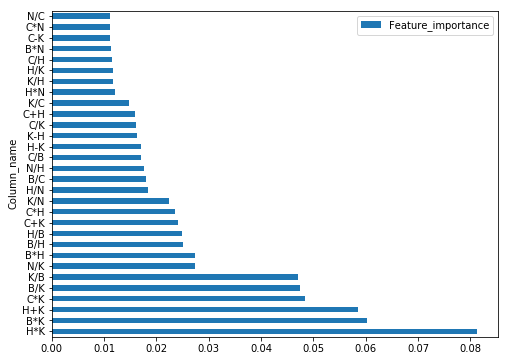

In [200]:
feat_imp = pd.DataFrame(grid_feat_rf.best_estimator_.feature_importances_)
feat_imp.columns = ['Feature_importance']
feat_imp = feat_imp.assign(Column_name=feat_interact)
feat_imp.sort_values(by=['Feature_importance'],ascending=False).set_index('Column_name').head(30).plot(kind='barh',figsize=(8,6))

In [285]:
feat_imp_intr = feat_imp.sort_values(by=['Feature_importance'],ascending=False).head(15)['Column_name'].values.tolist()

In [287]:
##XGBOOST
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
param_dist = {"max_depth": [5,10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200,500],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(xgb_model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(train_enc[numerical+enc_freq_cols+enc_mean_cat+feat_interact],train_enc['P'])

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 207 out of 216 | elapsed:   14.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   14.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 30, 50], 'min_child_weight': [1, 3, 6], 'n_estimators': [200, 500], 'learning_rate': [0.05, 0.1, 0.16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [260]:
check_xgb = grid_search.best_estimator_

In [291]:
scores = cross_val_score(check_xgb,train_enc[numerical+enc_freq_cols+enc_mean_cat+feat_interact],train_enc['P'],cv=5,scoring='roc_auc')

In [292]:
scores.mean()

0.9397149548343927

As we can see,the interaction features definitely has improved the performance of our model.

In [301]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200}

In [302]:
final_xgb_params = {'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200}

In [303]:
xgb_final = XGBClassifier(**final_xgb_params)

In [304]:
xgb_final.fit(train_enc[numerical+enc_freq_cols+enc_mean_cat+feat_interact],train_enc['P'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [305]:
final_preds = xgb_final.predict(test_enc[numerical+enc_freq_cols+enc_mean_cat+feat_interact])

In [307]:
#initial submission
submissions=pd.DataFrame(columns=['id', 'P'])
submissions['id']=test_df['id']
submissions['P']=final_preds
submissions.to_csv('mmtsub2.csv', index=False)

In [308]:
pred = pd.read_csv('mmtsub2.csv')

In [310]:
##we'll perform ensembling in another notebook to further improve predictions and we could tune the hyperparameters further to improve performance of model